<a href="https://colab.research.google.com/github/HaEunMok/Data_science/blob/main/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4%5D_decision_tree_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0_(scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

- 범주형 변수를 수치형 변수로 변환
- Nan 값을 대체값으로 변환

# Decision Tree

## 1. classification

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [2]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [3]:
# 모델 학습
# ㅌX가 0일 때는 0, 1일 때는 1로 예측하는 모델 학습
clf= clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [4]:
# 예측
# 학습한 0과 1로만 결과가 산출
clf.predict([[2., 2.]])

array([1])

In [5]:
# 비율로 예측
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

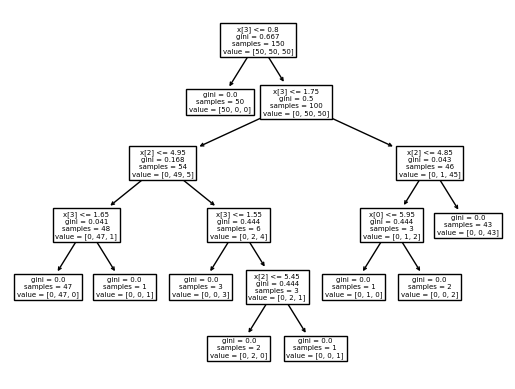

In [8]:
tree.plot_tree(clf)

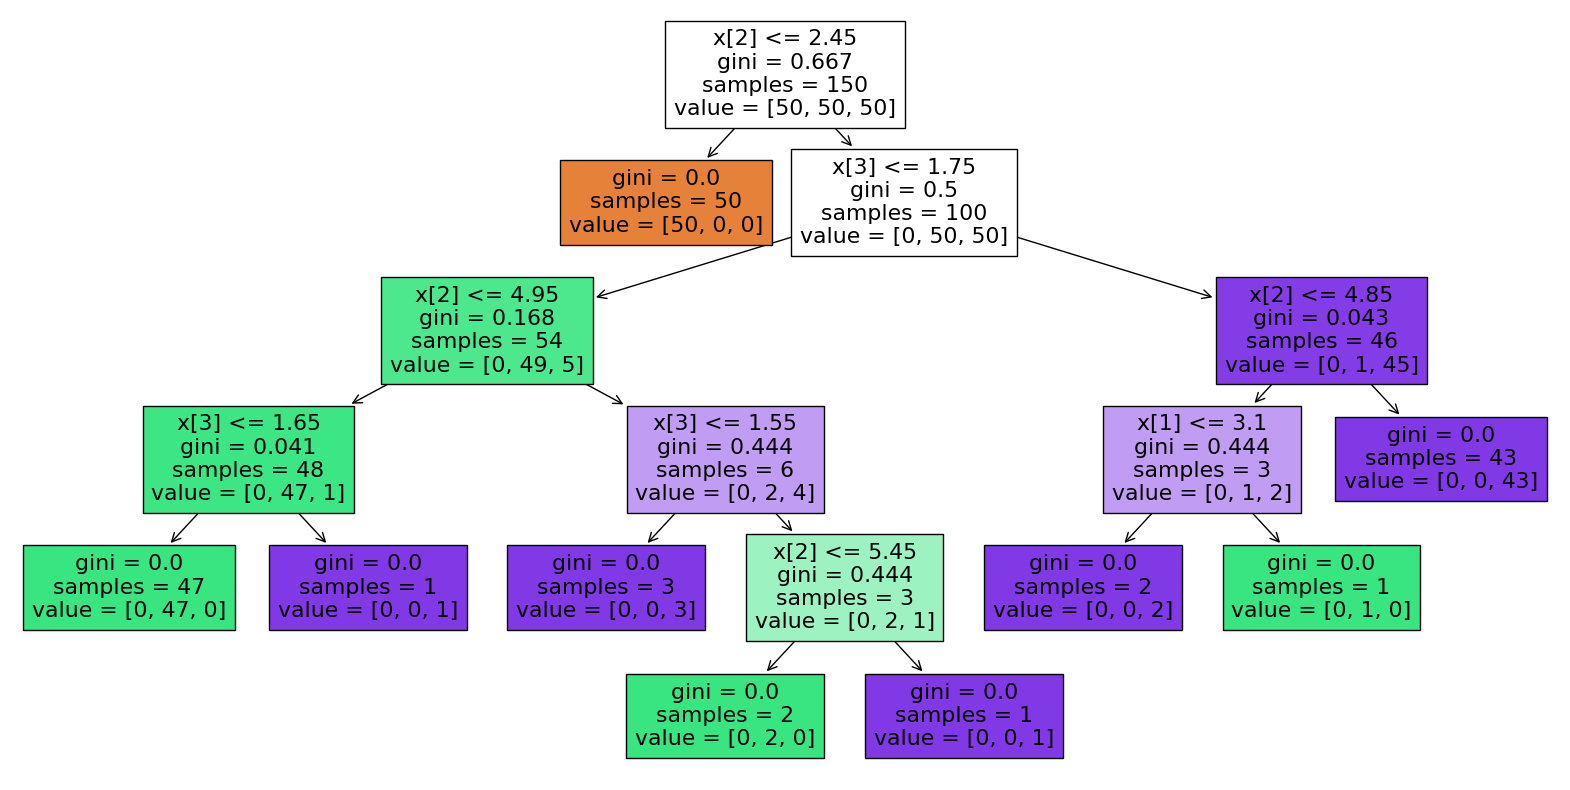

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
t=tree.plot_tree(clf.fit(X, y), filled=True)
#  filled 로 색 지정

## 2. 당뇨병 데이터셋을 이용한 의사결정나무 분류 모델 만들기




### 데이터

- pima 인디언들의 당뇨병에 대한 정보. 서구화된 식습관으로 인한 당뇨 데이터
- 당뇨병 여부를 예츨할 수 있는 데이터
- 숫자로만 이루어져 전처리가 필요하지 않음


Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 라이브러리 로드

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [11]:
df= pd.read_csv("/content/drive/MyDrive/ML DL/diabetes.csv")
df.shape

(768, 9)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 수치형 변수를 범주형 변수로 변경하기

수치데이터 -> 범주데이터 -> 수치데이터

**one - hot - encodind**

ML 성능향상을 위해 중요한 기법

항상 성능이 좋아지는 것은 아님


In [13]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [14]:
df['Age_low']=df['Age']<25
df['Age_middle']=(df['Age']>=25) & (df['Age']<=60)
df['Age_high']=df['Age']>60
df[["Age","Age_low","Age_high"]].head()

,Age,Age_low,Age_high
0,50,False,False
1,31,False,False
2,32,False,False
3,21,True,False
4,33,False,False


<Axes: xlabel='Age_high', ylabel='count'>

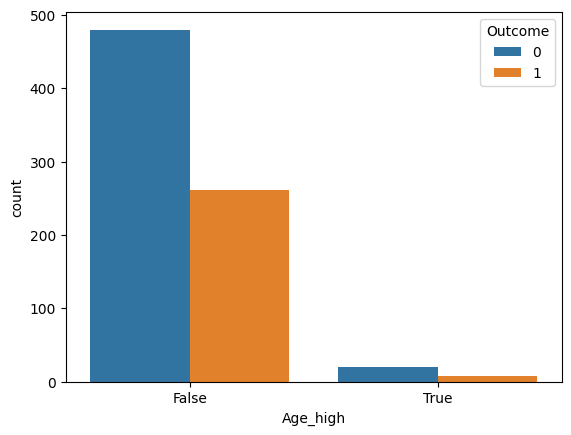

In [15]:
sns.countplot(data=df, x="Age_high", hue='Outcome')

# 결측치 다루기

0인 값을 처리하기


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [17]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [18]:
df["Insulin_nan"].isnull().sum()

374

In [19]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [20]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-20-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [21]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206

### 학습, 예측 데이터 나누기

In [22]:
# 8:2 비율로 split. 학습데이터 : 테스트데이터 = 8:2
split_count = int(df.shape[0] * 0.8)
split_count

614

In [23]:
train = df[:split_count].copy()
train.shape

(614, 14)

In [24]:
test = df[split_count:].copy()
test.shape

(154, 14)

### 학습, 예측에 사용할 칼럼 추출

In [25]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Insulin")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan']

### 예측 칼럼 추출

In [26]:
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측 데이터셋 생성하기
- 학습데이터와 예측 데이터 행의 갯수가 일치하여야 한다

In [27]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
0,148,72,35,33.6,0.627,50,False,206.0
1,85,66,29,26.6,0.351,31,False,130.0
2,183,64,0,23.3,0.672,32,True,206.0
3,89,66,23,28.1,0.167,21,False,94.0
4,137,40,35,43.1,2.288,33,False,168.0


In [28]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
X_test= test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
614,138,74,26,36.1,0.557,50,True,144.0
615,106,72,0,25.8,0.207,27,False,130.0
616,117,96,0,28.7,0.157,30,False,130.0
617,68,62,13,20.1,0.257,23,False,15.0
618,112,82,24,28.2,1.282,50,True,206.0


In [30]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 로드

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

### 학습

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 예측

In [33]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

# 시각화

## 트리 알고리즘

[Text(0.5537330316742082, 0.9666666666666667, 'Insulin_nan <= 143.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.30995475113122173, 0.9, 'BMI <= 50.0\ngini = 0.163\nsamples = 380\nvalue = [346, 34]'),
 Text(0.2918552036199095, 0.8333333333333334, 'Glucose <= 124.5\ngini = 0.147\nsamples = 376\nvalue = [346, 30]'),
 Text(0.14027149321266968, 0.7666666666666667, 'Insulin_nan <= 129.5\ngini = 0.073\nsamples = 290\nvalue = [279, 11]'),
 Text(0.12217194570135746, 0.7, 'Insulin_nan <= 127.5\ngini = 0.148\nsamples = 137\nvalue = [126, 11]'),
 Text(0.10407239819004525, 0.6333333333333333, 'Glucose <= 99.5\ngini = 0.136\nsamples = 136\nvalue = [126, 10]'),
 Text(0.05429864253393665, 0.5666666666666667, 'DiabetesPedigreeFunction <= 0.248\ngini = 0.047\nsamples = 83\nvalue = [81, 2]'),
 Text(0.03619909502262444, 0.5, 'DiabetesPedigreeFunction <= 0.241\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.01809954751131222, 0.43333333333333335, 'gini = 0.0\nsamples = 14\nvalue = [

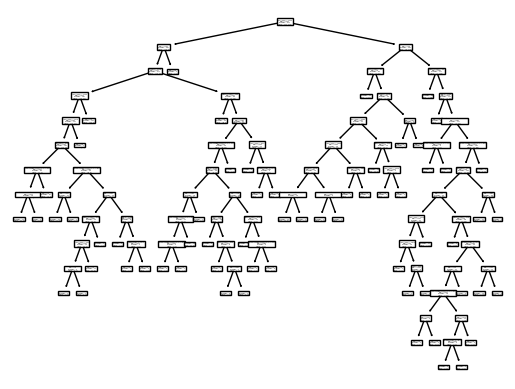

In [34]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

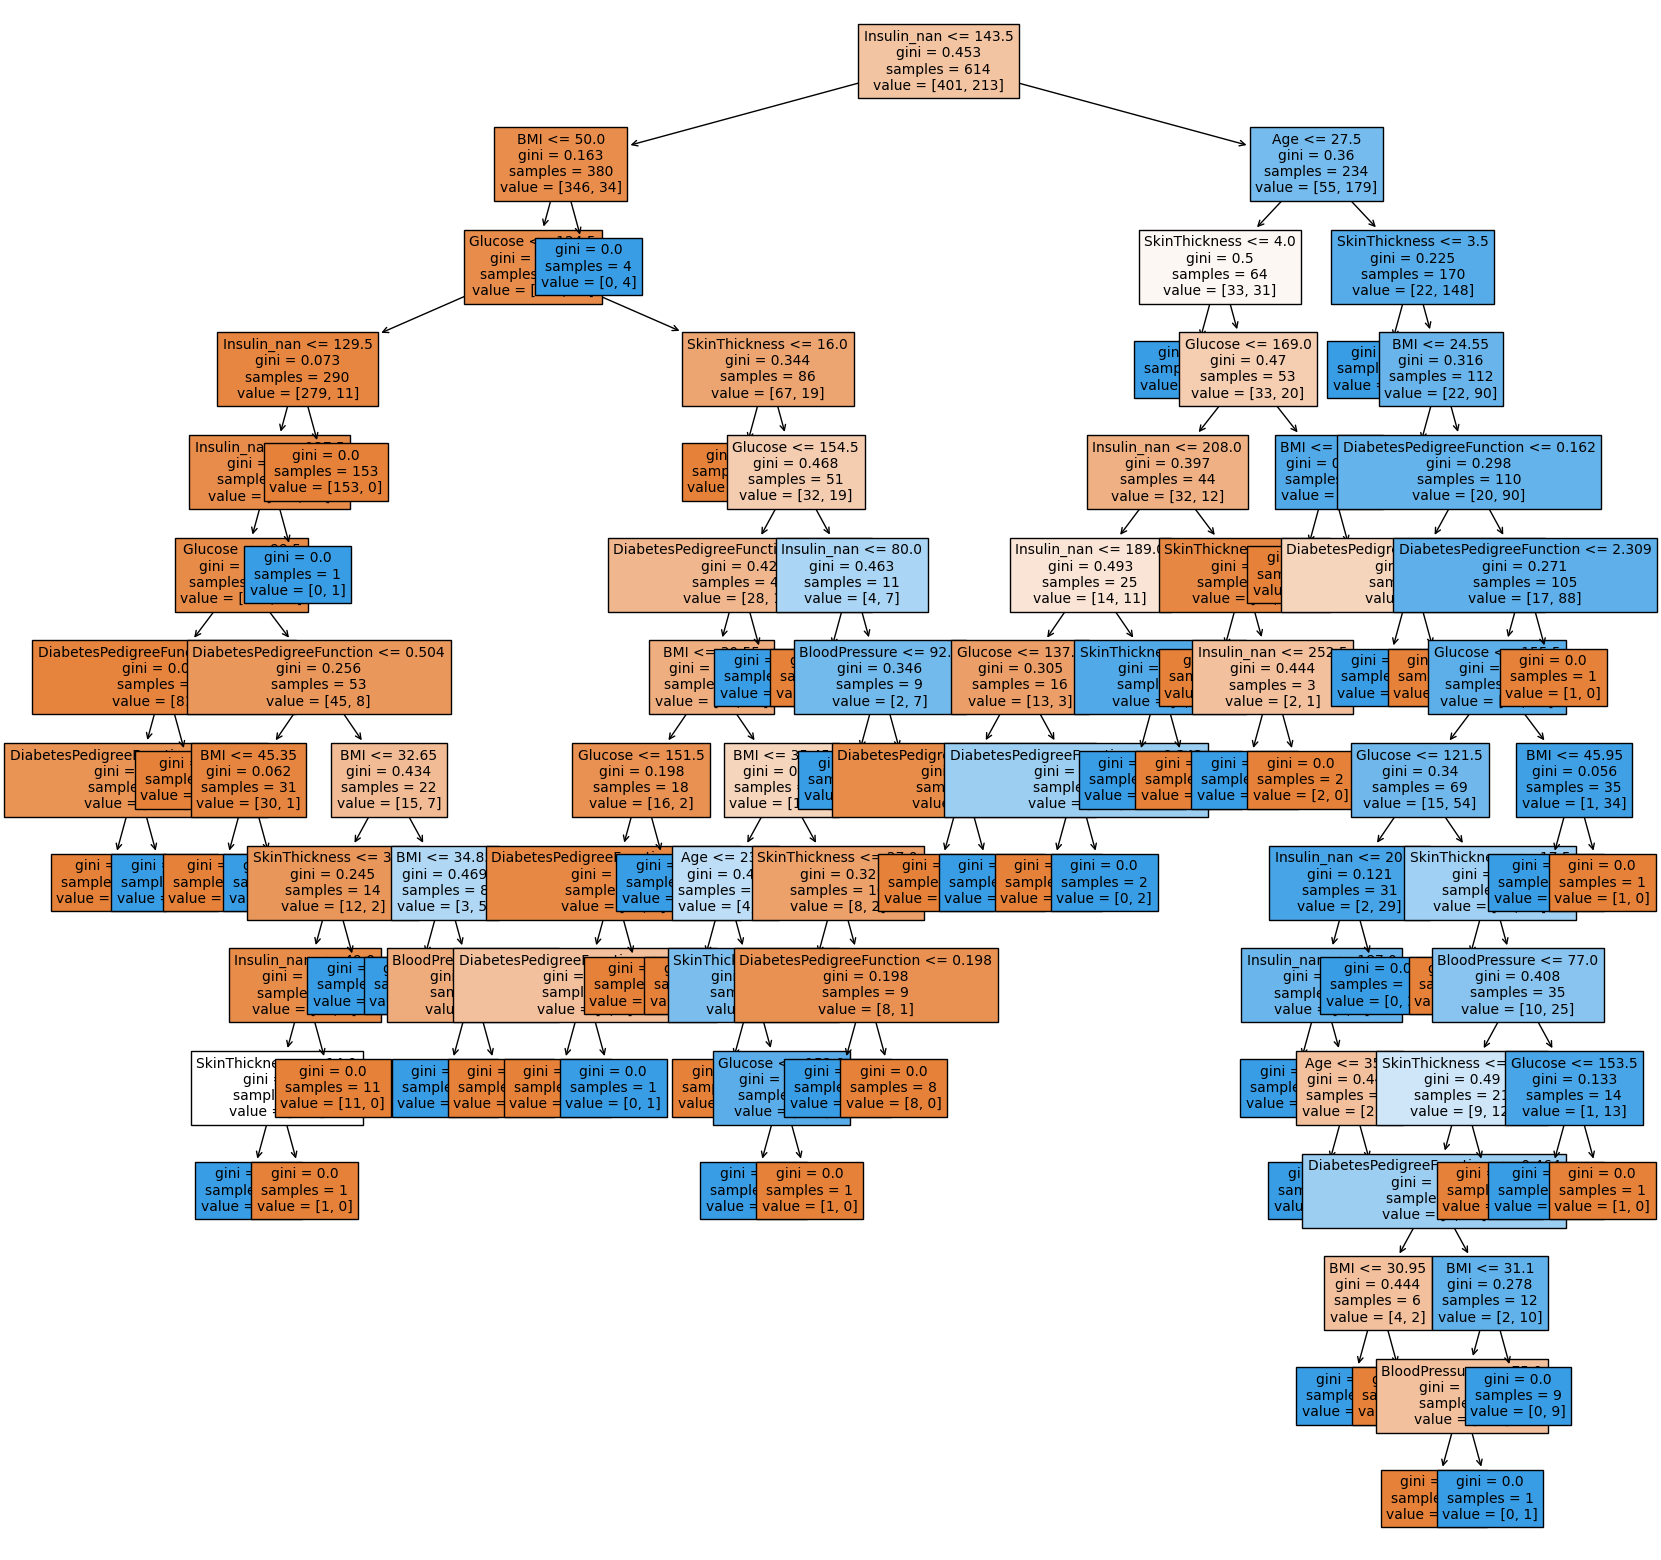

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True,
                           fontsize=10)

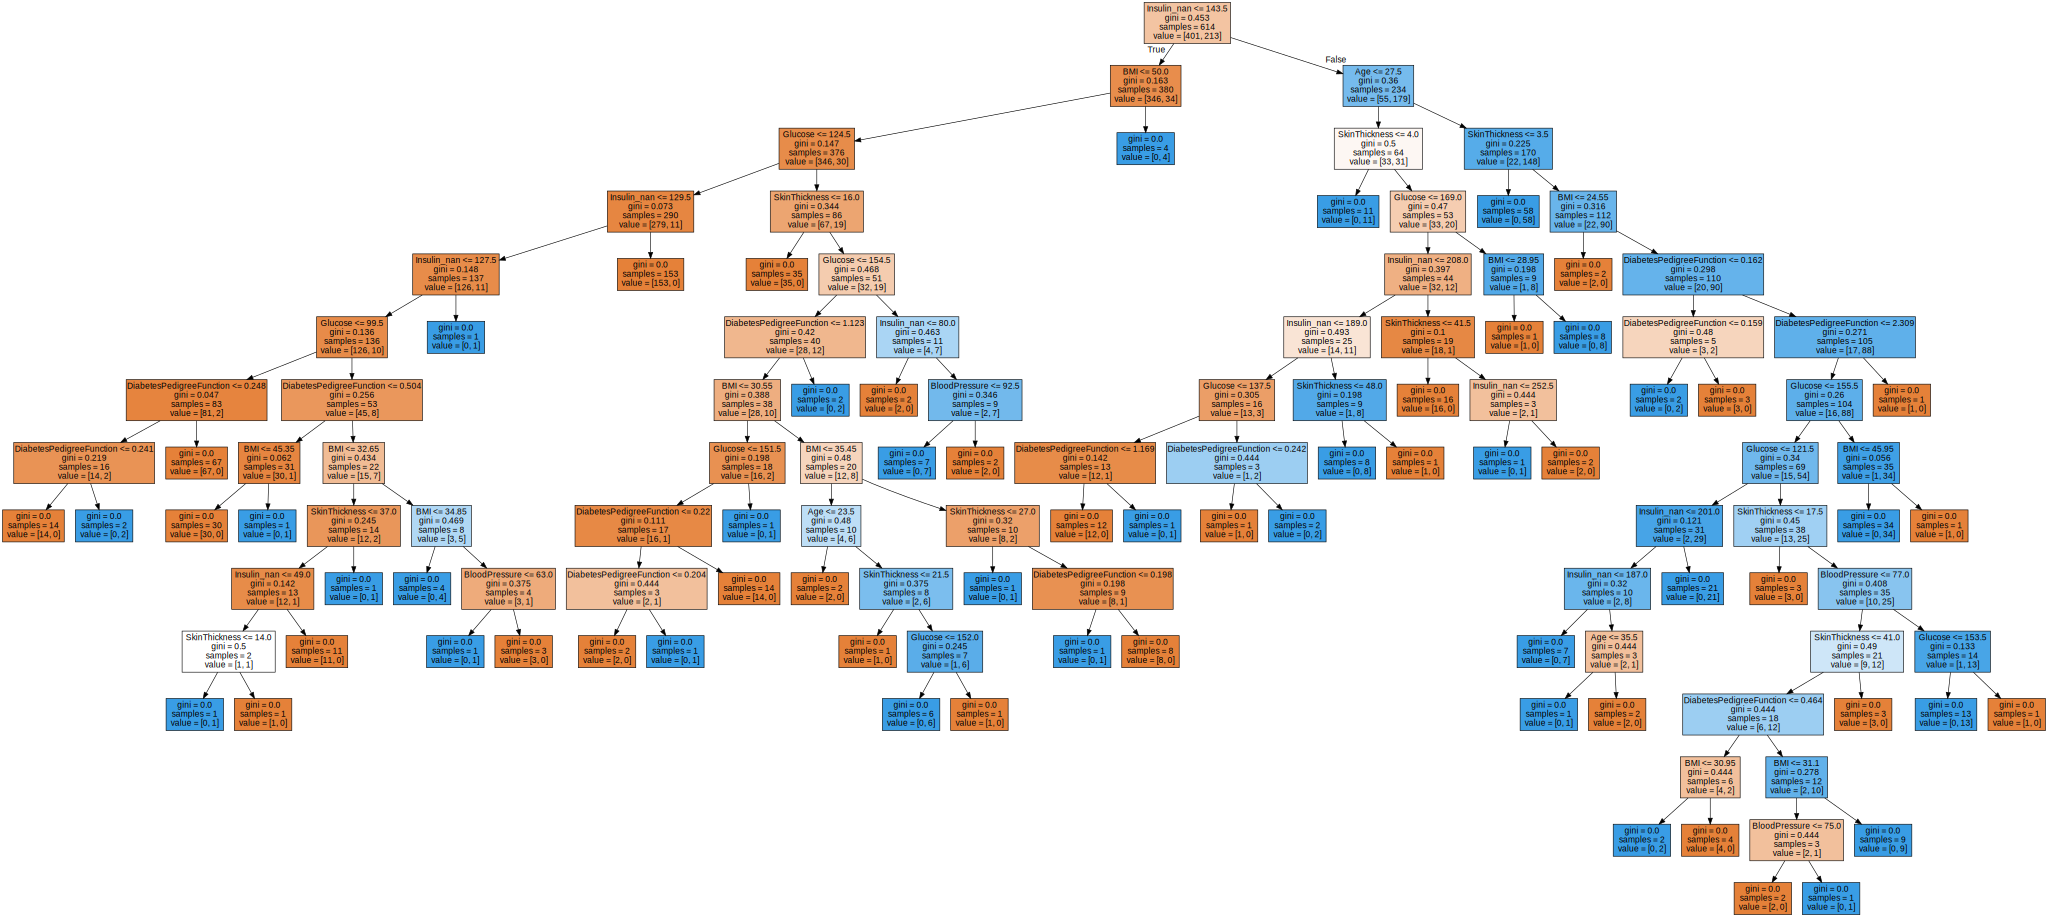

In [36]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [37]:
# 피처의 중요도 추충
model.feature_importances_

array([0.08747114, 0.02906819, 0.10246683, 0.09867739, 0.08108996,
       0.06111749, 0.        , 0.540109  ])

<Axes: >

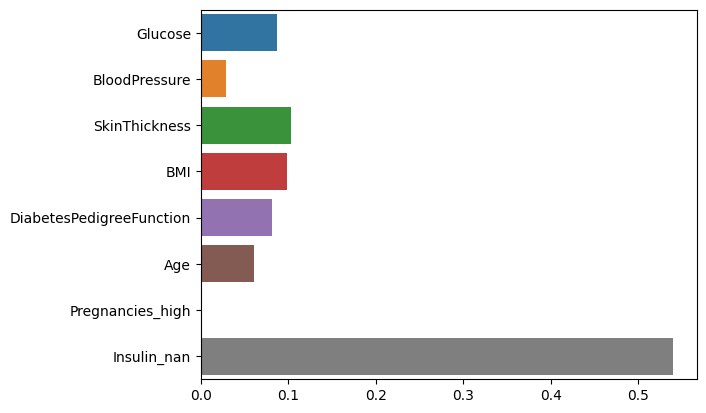

In [38]:
# 피처의 중요도 시각화
# 클루코스가 당뇨병 여부를 결정하는 핵심 피처이다.
sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도 예측하기

In [39]:
# 44- > 39 -> 49(age 25기준) -> 55(age 30 기준) -> 23(인슐린 결측치를 평균으로 대체)
diff_count = abs(y_test - y_predict).sum()
diff_count

23

In [40]:
abs(y_test - y_predict).sum() / len(y_test) # 28% 잘못 예측했다

0.14935064935064934

In [44]:
# 71 -> (인슐린 결측치를 평균으로 대체)
 (len(y_test) - diff_count) / len(y_test) * 100 # 71% 맞았다

85.06493506493507

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8506493506493507

In [43]:
# 범주화 74
# null 평균값으로 변환 85

model.score(X_test, y_test) * 100

85.06493506493507